In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

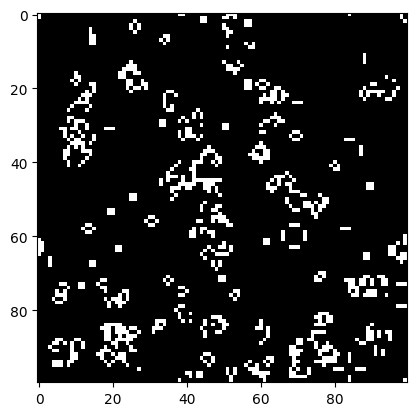

In [24]:
# 初期状態の生成（0: 死, 1: 生）
grid = np.random.choice([0, 1], size=(100, 100), p=[0.8, 0.2])

fig, ax = plt.subplots()

im = ax.imshow(grid, cmap='gray')

# セルの状態を更新する関数
def update(frame):
    global grid
    new_grid = grid.copy()
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            # 周囲8セルの状態を調べる
            total = int((grid[i, (j-1)%grid.shape[1]] + grid[i, (j+1)%grid.shape[1]] +
                         grid[(i-1)%grid.shape[0], j] + grid[(i+1)%grid.shape[0], j] +
                         grid[(i-1)%grid.shape[0], (j-1)%grid.shape[1]] + grid[(i-1)%grid.shape[0], (j+1)%grid.shape[1]] +
                         grid[(i+1)%grid.shape[0], (j-1)%grid.shape[1]] + grid[(i+1)%grid.shape[0], (j+1)%grid.shape[1]]) / 1)
            
            # ライフゲームのルール
            if grid[i, j] == 1:
                if (total < 2) or (total > 3):
                    new_grid[i, j] = 0
            else:
                if total == 3:
                    new_grid[i, j] = 1
    grid = new_grid
    im.set_array(grid)

ani = FuncAnimation(fig, update, frames=100)
HTML(ani.to_jshtml())